In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
authors = pd.read_csv('data/athenaeum_authors_preview.csv')

In [3]:
authors.head(10)

,art_movement,author_id,bio_url,birth_year,death_year,first_name,last_name,nationality,num_works
0,Impressionist,24,http://www.the-athenaeum.org/people/detail.php...,1841,1919.0,Pierre Auguste,Renoir,French,1714
1,Symbolist,1793,http://www.the-athenaeum.org/people/detail.php...,1863,1944.0,Edvard,Munch,Norwegian,1673
2,Impressionist,368,http://www.the-athenaeum.org/people/detail.php...,1856,1925.0,John Singer,Sargent,American,1669
3,Impressionist,13,http://www.the-athenaeum.org/people/detail.php...,1840,1926.0,Oscar-Claude,Monet,French,1295
4,Romantic,1315,http://www.the-athenaeum.org/people/detail.php...,1775,1851.0,Joseph Mallord William,Turner,English,1258
5,Impressionist,418,http://www.the-athenaeum.org/people/detail.php...,1824,1898.0,Eugène,Boudin,French,1182
6,Post-Impressionist,444,http://www.the-athenaeum.org/people/detail.php...,1830,1903.0,Camille,Pissarro,French,1117
7,NaN,9266,http://www.the-athenaeum.org/people/detail.php...,1830,1890.0,Marianne,North,English,1048
8,Post-Impressionist,789,http://www.the-athenaeum.org/people/detail.php...,1853,1890.0,Vincent Willem van,Gogh,Dutch,899
9,Barbizon,110,http://www.the-athenaeum.org/people/detail.php...,1796,1875.0,Jean-Baptiste-Camille,Corot,French,801


In [4]:
authors.describe(include = 'all')

,art_movement,author_id,bio_url,birth_year,death_year,first_name,last_name,nationality,num_works
count,1391,8376.000000,8376,8376.000000,8349.000000,8301,8376,8337,8376.000000
unique,40,NaN,8376,NaN,NaN,4557,6621,59,NaN
top,Dutch Golden Age,NaN,http://www.the-athenaeum.org/people/detail.php...,NaN,NaN,John,Unknown,American,NaN
freq,227,NaN,1,NaN,NaN,123,43,1388,NaN
mean,NaN,5675.683739,NaN,1785.513610,1850.205773,NaN,NaN,NaN,24.891117
std,NaN,3314.342495,NaN,123.363088,129.300183,NaN,NaN,NaN,71.023749
min,NaN,3.000000,NaN,400.000000,19.000000,NaN,NaN,NaN,1.000000
25%,NaN,2751.750000,NaN,1780.000000,1844.000000,NaN,NaN,NaN,2.000000
50%,NaN,5799.500000,NaN,1834.000000,1901.000000,NaN,NaN,NaN,6.000000
75%,NaN,8463.250000,NaN,1858.000000,1926.000000,NaN,NaN,NaN,19.000000


In [5]:
authors.groupby('art_movement').agg({'num_works': 'sum'}).sort_values('num_works', ascending = False)

,num_works
art_movement,
Impressionist,15232
Post-Impressionist,8649
Dutch Golden Age,7683
Renaissance,6550
Academist,6090
Romantic,5519
Expressionist,4963
Rococo,4772
Baroque,4581


In [6]:
authors['num_works'].sum()

208488

In [7]:
authors.loc[authors['art_movement'].isnull(), 'num_works'].sum()/float(authors['num_works'].sum())

0.5381700625455662

In [8]:
sum(authors['num_works'] == 1)

1270

In [9]:
authors_complete = pd.read_csv('data/athenaeum_authors.csv')
paintings = pd.read_csv('data/athenaeum_paintings.csv')

In [10]:
authors_complete.describe(include = 'all')

,first_name,last_name,death_year,bio_url,nationality,art_movement,author_id,bio_info,birth_year
count,8302,8377,8351.000000,8377,8338,1391,8377.000000,555,8377.000000
unique,4557,6621,NaN,8377,59,40,NaN,519,NaN
top,John,Unknown,NaN,http://www.the-athenaeum.org/people/detail.php...,American,Dutch Golden Age,NaN,External links:,NaN
freq,123,43,NaN,1,1388,227,NaN,22,NaN
mean,NaN,NaN,1850.120345,NaN,NaN,NaN,5675.285663,NaN,1785.413394
std,NaN,NaN,129.420641,NaN,NaN,NaN,3314.344907,NaN,123.502454
min,NaN,NaN,19.000000,NaN,NaN,NaN,3.000000,NaN,400.000000
25%,NaN,NaN,1844.000000,NaN,NaN,NaN,2751.000000,NaN,1780.000000
50%,NaN,NaN,1901.000000,NaN,NaN,NaN,5799.000000,NaN,1834.000000
75%,NaN,NaN,1926.000000,NaN,NaN,NaN,8463.000000,NaN,1858.000000


In [11]:
paintings.describe(include = 'all')

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
count,175098,206675,0.0,132682,132682.000000,207352,207353,132682,207352,207349,207353.000000,207353.000000,132682.000000
unique,36,3594,NaN,1,NaN,12,207350,1,6839,153180,NaN,NaN,NaN
top,oil on canvas,Private collection,NaN,cm,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,cm,Date unknown,Landscape,NaN,NaN,NaN
freq,123284,74902,NaN,132682,NaN,173570,2,132682,57696,982,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,70.298652,NaN,NaN,NaN,NaN,NaN,3616.637473,131441.079049,73.495612
std,NaN,NaN,NaN,NaN,59.157431,NaN,NaN,NaN,NaN,NaN,3158.509007,79528.109135,77.375487
min,NaN,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,NaN,NaN,3.000000,33.000000,0.940000
25%,NaN,NaN,NaN,NaN,35.600000,NaN,NaN,NaN,NaN,NaN,622.000000,57931.000000,38.300000
50%,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,2749.000000,132743.000000,60.960000
75%,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,NaN,NaN,5753.000000,198532.000000,91.375000


In [12]:
paintings[paintings['painting_url'].duplicated(keep = False)]

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
44867,oil on canvas,National Maritime Museum - London (United Kin...,NaN,cm,127.0,Painting,http://www.the-athenaeum.org/art/display_image...,cm,circa 1712,Vice-Admiral Sir John Leake,2948,114402,101.6
73713,oil on canvas,"Château de Versailles (France - Versailles, G...",NaN,NaN,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,NaN,1844,Concert in the Gallerie des Guise at Chateau d’Eu,445,87448,NaN
80870,NaN,Musée des Beaux-Arts de Brest (France - Brest),NaN,NaN,NaN,Unknown,http://www.the-athenaeum.org/art/display_image...,NaN,Date unknown,Fish Shop,6783,134110,NaN
162503,oil on canvas,Thorvaldsens Museum - Copenhagen (Denmark - C...,NaN,NaN,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,NaN,1830,Entrance to the Port of Copenhagen with the Ma...,748,91788,NaN
169758,bronze,Musée Rodin - Paris (France - Paris),NaN,cm,33.0,Sculpture,http://www.the-athenaeum.org/art/display_image...,cm,1881-1882,Alphonse Legros,220,137162,21.0
203144,NaN,Unknown,NaN,NaN,NaN,Unknown,http://www.the-athenaeum.org/art/display_image...,NaN,Date unknown,The Colonade in Versailles,363,54840,NaN


In [13]:
paintings[paintings['painting_id'].duplicated(keep = False)]

,medium,painting_location,image_out,height_uom,height,article_type,painting_url,width_uom,painting_dates,painting_title,author_id,painting_id,width
170559,NaN,Rijksmuseum Amsterdam (Netherlands - Amsterdam),NaN,NaN,NaN,Unknown,http://www.the-athenaeum.org/art/display_image...,NaN,1889,Meisje aan de piano,2336,51281,NaN
207346,watercolor,British Museum (United Kingdom - London),NaN,cm,50.1,Painting,http://www.the-athenaeum.org/art/display_image...,cm,1781,Villa of Maecenas at Tivoli,2962,51281,38.3


In [14]:
from PIL import Image
import os, sys

In [15]:
painting_sizes = []
num_processed = 0
total = len(paintings)
for key, row in paintings.iterrows():
    num_processed += 1
    try:
        image_path = os.path.join('data/images_athenaeum/full',str(row['author_id']) , str(row['painting_id']) + '.jpg')
        if os.path.exists(image_path):
            im = Image.open(image_path)
            painting_sizes.append([im.height, im.width])
        else:
            painting_sizes.append([None, None])
        sys.stdout.write('\r\x1b[2K%d/%d' % (num_processed, total))
        sys.stdout.flush()
    except BaseException as e:
        painting_sizes.append([None, None])
        sys.stderr.write(str(e) + '\n')
        sys.stderr.flush()

print ''
painting_sizes_df = pd.concat((paintings[['author_id', 'painting_id']].reset_index(drop = True),
                               pd.DataFrame(painting_sizes, columns = ['height_px', 'width_px'])), axis = 1)

207353/207353


In [20]:
paintings_reduced = paintings.drop(['height_uom', 'width_uom', 'image_out'], axis = 1)\
    .merge(painting_sizes_df, how = 'inner', on = ['author_id', 'painting_id'])\
    .dropna(subset = ['height_px', 'width_px'])

In [21]:
paintings_reduced.to_csv('data/athenaeum_paintings_sizes.csv', index = False)

In [22]:
paintings_reduced[['height_px', 'width_px']].describe()

,height_px,width_px
count,207245.000000,207245.000000
mean,900.058216,934.802794
std,325.118209,335.233085
min,79.000000,103.000000
25%,685.000000,728.000000
50%,848.000000,898.000000
75%,1024.000000,1096.000000
max,4000.000000,3825.000000


In [76]:
paintings_reduced['author_id'].value_counts()

24       1714
1793     1673
368      1669
13       1295
1315     1258
418      1182
444      1117
9266     1048
789       899
110       801
144       734
1742      728
1310      700
3325      698
1800      687
3642      683
93        658
106       656
1628      655
1627      620
326       608
2741      606
2410      599
328       593
373       578
105       574
5594      570
91        554
5478      545
1713      535
         ... 
1601        2
7395        2
1421        2
3468        2
1293        2
9925        2
7310        2
5346        2
5135        2
4160        2
9770        2
2243        2
1145        2
6465        2
1198        2
6926        2
2371        2
11109       2
11016       2
3688        2
6721        2
10911       2
10823       2
1273        2
10951       2
7065        2
1401        2
6414        2
1529        2
3182        2
Name: author_id, dtype: int64

In [23]:
import cv2

In [24]:
img = cv2.imread('data/images_athenaeum/full/340/132270.jpg')

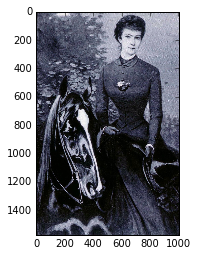

In [28]:
plt.imshow(img)

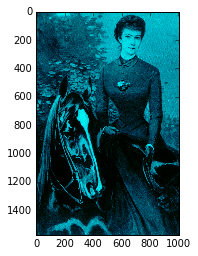

In [34]:
img2 = img.copy()
img2[:, :, 0] = 0
plt.imshow(img2)

In [35]:
[i for i in dir(cv2) if i.startswith('COLOR_')]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLOR_BGR2HLS_FULL',
 'COLOR_BGR2HSV',
 'COLOR_BGR2HSV_FULL',
 'COLOR_BGR2LAB',
 'COLOR_BGR2LUV',
 'COLOR_BGR2RGB',
 'COLOR_BGR2RGBA',
 'COLOR_BGR2XYZ',
 'COLOR_BGR2YCR_CB',
 'COLOR_BGR2YUV',
 'COLOR_BGR2YUV_I420',
 'COLOR_BGR2YUV_IYUV',
 'COLOR_BGR2YUV_YV12',
 'COLOR_BGR5552BGR',
 'COLOR_BGR5552BGRA',
 'COLOR_BGR5552GRAY',
 'COLOR_BGR5552RGB',
 'COLOR_BGR5552RGBA',
 'COLOR_BGR5652BGR',
 'COLOR_BGR565

In [36]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [38]:
img_hsv[:,:,0].max()

177

In [67]:
hist_settings = [(0, 20, 0, 180), (1, 5, 0, 256), (2, 5, 0, 256)]
def open_image_rgb(author_id, painting_id):
    return cv2.imread('data/images_athenaeum/full/%d/%d.jpg' % (author_id, painting_id))

def image_histogram(img_rgb):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    return np.hstack([cv2.calcHist([img_hsv], [channel], None, [bins], [l, h]).astype(np.float).reshape(bins) / img.size
                      for channel, bins, l, h in hist_settings])

def get_histogram(author_id, painting_id):
    return image_histogram(open_image_rgb(author_id, painting_id))

In [73]:
import time
start_time = time.time()
for i, (author_id, painting_id) in painting_sizes_df.iloc[:1000][['author_id', 'painting_id']].iterrows():
    get_histogram(author_id, painting_id)
print (time.time() - start_time)

55.5987257957


In [70]:
get_histogram(6783, 134110)

array([  5.74593756e-03,   8.43222434e-04,   7.37898465e-05,
         2.81704827e-05,   5.92841502e-05,   1.04398968e-03,
         3.63693546e-05,   1.11441589e-03,   3.90392436e-04,
         1.01960329e-03,   2.40163877e-03,   1.51196657e-01,
         5.99734861e-02,   8.56529834e-03,   4.41729987e-03,
         2.73127546e-03,   1.82561546e-03,   2.31586595e-03,
         2.47942293e-03,   3.99306081e-03,   2.04200261e-02,
         8.37058564e-02,   1.13165244e-01,   2.32496880e-02,
         9.71398130e-03,   5.10884318e-02,   4.90624695e-02,
         8.78479685e-02,   5.34074511e-02,   8.84847476e-03])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_paintings, test_paintings = train_test_split(paintings, test_size = 0.2, stratify = paintings.author_id)